In [104]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
from pathlib import Path
import pandas as pd
from scipy.stats import binned_statistic_2d
from functions import *

In [105]:
output_folder = Path.cwd()/"output_plots"

# Import and read the dataframe from cn04 

In [106]:
cwd = Path.cwd()
filename = cwd / "data_2024_05_28_to_2024_05_29.pkl"
data_file = Path(filename)

all_data = pd.read_pickle(data_file)

In [107]:
def plot_function(data_to_plot, title):
    
    def plotimg(idx):
        # Update histogram
        ax[0].clear()
        ax[0].hist(data_to_plot[int(idx)].flatten(), bins = len(np.unique(data_to_plot[int(idx)].flatten())))
        # Update image
        img.set_data(data_to_plot[int(idx),:,:])
        im = ax[1].imshow(data_to_plot[int(idx),:,:], origin='lower', cmap = 'viridis')
        ax[0].axvline(np.nanmedian(data_to_plot[int(idx),:,:]), c = 'r',  alpha = 0.5) # median pixel value
        ax[0].axvline(np.nanmean(data_to_plot[int(idx),:,:]), c = 'g', alpha = 0.5) # mean pixel value
        #plt.colorbar(im)
        fig.canvas.draw_idle()
        
    fig, ax = plt.subplots(ncols = 2, figsize=(12,4))
    img = ax[1].imshow(data_to_plot[0], origin='lower')
    #colorbar = plt.colorbar(img)
    ax[0].set_xlabel('Brightness')
    ax[0].set_ylabel('Nb of pixels')
    plt.suptitle(title, weight = 'bold')

    ipywidgets.interact(plotimg, idx = ipywidgets.FloatSlider(value=0,min=0,max=np.shape(data_to_plot)[0]-1,step=1))
    plt.show()
    
def apply_filters(data, filter_names, values, reverse_filters):
    
    # Available filters ['latitude-','latitude+','visit','density_cosmics','nb_cosmics','no_straylight','largest_cosmics','percentage_cosmics']
    list_filter_names = ['time-','time+','latitude-','latitude+','visit','density_cosmics','nb_cosmics','no_straylight','largest_cosmics','percentage_cosmics']
    
    filtered_data = data.copy()
    
    for filter_name, value, reverse in zip(filter_names,values, reverse_filters): 
        
        if reverse:
            inf = '>'
            sup = '<'
        else: 
            inf = '<'
            sup = '>'
            
        if filter_name == 'time-':
            print(f"Keep data {sup} {value}")
            filter_to_apply = filtered_data['time'] >= value
        elif filter_name == 'time+':
            print(f"Keep data {inf} {value}")
            filter_to_apply = filtered_data['time'] <= value
        elif filter_name == 'latitude-':
            print(f"Kepp data with latitude {sup} {value}")
            filter_to_apply = filtered_data['LATITUDE'] > value
        elif filter_name == 'latitude+':
            print(f"Keep with latitude {inf} {value}")
            filter_to_apply = filtered_data['LATITUDE'] < value  
        elif filter_name == 'visit':
            print(f"Keep data only from {value}")
            filter_to_apply = filtered_data['visit_ID'] == value
        elif filter_name == 'density_cosmics':
            print(f"Keep data only with a density of cosmics {sup} {value}")
            filter_to_apply = filtered_data['density_cosmics'] > value        
        elif filter_name == 'nb_cosmics':
            print(f"Keep data only with a number of cosmics {sup} {value}")
            filter_to_apply = filtered_data['nb_cosmics'] > value        
        elif filter_name == 'no_straylight':
            if reverse:
                print(f"Keep data only affected with straylight")
            else:
                print(f"Keep data only not affected with straylight")
            filter_to_apply = filtered_data['straylight_boolean']
            filter_to_apply = ~filter_to_apply
        elif filter_name == 'largest_cosmics':
            print(f"Keep data only with a largest cosmic {inf} {value}")
            filter_to_apply = filtered_data['largest_cosmics'] < value
        elif filter_name == 'percentage_cosmics':
            print(f"Keep data images with {inf} {value}% of pixels affected by cosmics")
            filter_to_apply = filtered_data['percentage_cosmics'] < value
        else:
            print(f"{filter_name} not in {list_filter_names}")   
            
        # apply filter 
        if reverse:
            filter_to_apply = ~filter_to_apply

        nb_points = len(filtered_data)
        filtered_data = filtered_data[filter_to_apply]
        nb_datapoints_remomoved =  nb_points - len(filtered_data)
        print(f"Removed {nb_datapoints_remomoved} data points, kept {len(filtered_data)}")
        
    return filtered_data

# Detections

In [108]:
# if len(np.unique(all_data['im_height'])) > 1:
#     diff_image_types = True # We have different image sizes in all_data
#     print(f"Sizes available are {np.unique(all_data['im_height'])}")
# else:
#     diff_image_types = False

## Filter images

In [109]:
# # DETECTIONS 
# detections = all_data[all_data['nb_cosmics'] != 0]
# #detections = all_data[(all_data['density_cosmics'] < 60) & (all_data['density_cosmics'] > 40)]
# non_detections = all_data[all_data['nb_cosmics'] == 0]

# max_cosmics = np.max(detections['nb_cosmics'])
# max_density = np.max(detections['density_cosmics'])

# print(f'Frame with most cosmics has {max_cosmics} cosmics. largest density is {int(max_density)} hits/cm2/sec')
# print(f"{int(len(detections)/len(all_data)*100)}% of visits ({len(detections)}/{len(all_data)}) have detections. {int(len(non_detections))} non detections\n")

# # separate different images sizes
# if diff_image_types:
#     size_to_keep = 200
#     detections_plot = detections[detections['im_height'] == size_to_keep]
#     non_detections_plot = non_detections[non_detections['im_height'] == size_to_keep]
#     print(f"!! Only images of sizes {size_to_keep}*{size_to_keep} are shown !!\n")
# else:     
#     detections_plot = detections
#     non_detections_plot = non_detections
    
# ## Add other filters 
# # Available filters ['latitude-','latitude+','visit','density_cosmics','nb_cosmics','no_straylight','largest_cosmics', 'percentage_cosmics']
# filters = ['no_straylight','largest_cosmics']#,'percentage_cosmics']
# values = [None, 150]#,5]
# reverse_filters = [False, False]#,True]

# detections_plot = apply_filters(detections_plot,filters,values,reverse_filters)
# print("")
# non_detections_plot = apply_filters(non_detections_plot,filters,values,reverse_filters)

Frame with most cosmics has 316 cosmics. largest density is 118 hits/cm2/sec
63% of visits (817/1287) have detections. 470 non detections

Keep data only not affected with straylight
Removed 10 data points, kept 807
Keep data only with a largest cosmic < 150
Removed 3 data points, kept 804

Keep data only not affected with straylight
Removed 1 data points, kept 469
Keep data only with a largest cosmic < 150
Removed 0 data points, kept 469


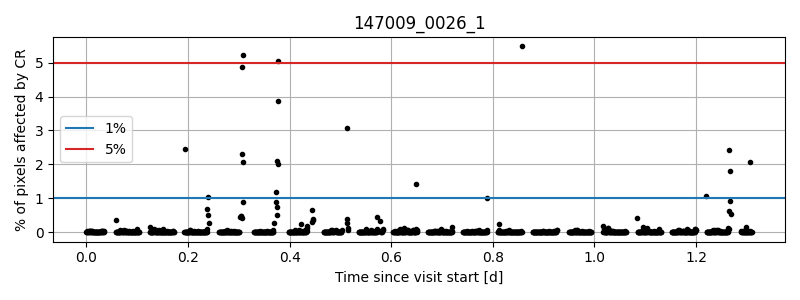

In [118]:
# plt.figure(figsize = (8,3))
# plt.plot(all_data.index-all_data.index[0],all_data.percentage_cosmics, 'k.')
# plt.axhline(1, color = 'C0',label= '1%')
# plt.axhline(5, color = 'C3',label = '5%')
# plt.title('147009_0026_1')
# plt.ylabel('% of pixels affected by CR')
# plt.xlabel('Time since visit start [d]')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('CR percentage.png', format = 'png', dpi = 600)
# plt.show()

# Plot detections and non-detections

In [ ]:
# detection = True # If False --> non_detections

# if detection:
#     str_title = 'DETECTIONS'
#     data = detections_plot
# else:
#     str_title = 'NON DETECTIONS'
#     data = non_detections_plot

# data_to_plot1 = reshape_flatten_images('masked_images', data) 
# data_to_plot2 = reshape_flatten_images('binary_images', data) 
# data_to_plot3 = reshape_flatten_images('derotated_images', data) 
# data_to_plot3 = np.log(data_to_plot3+1)
# visit_id = data['visit_ID'].values
# stacking_order = data['n_exp'].values
# image_counter = data['img_counter'].values
# threshold_cosmics = data['threshold_cosmics'].values
# cosmics = data['nb_cosmics'].values
# density_cosmics = data['density_cosmics'].values
# straylight_boolean = data['straylight_boolean'].values
# largest_cosmics = data['largest_cosmics'].values
# percentage_cosmics = data['percentage_cosmics'].values

# data_to_plot1 = reshape_flatten_images('masked_images', detections_plot) 
# data_to_plot2 = reshape_flatten_images('binary_images', detections_plot) 
# data_to_plot3 = reshape_flatten_images('derotated_images', detections_plot) 
# data_to_plot3 = np.log(data_to_plot3+1)
# visit_id = detections_plot['visit_ID'].values
# stacking_order = detections_plot['n_exp'].values
# image_counter = detections_plot['img_counter'].values
# threshold_cosmics = detections_plot['threshold_cosmics'].values
# cosmics = detections_plot['nb_cosmics'].values
# density_cosmics = detections_plot['density_cosmics'].values
# straylight_boolean = detections_plot['straylight_boolean'].values
# largest_cosmics = detections_plot['largest_cosmics'].values
# percentage_cosmics = detections_plot['percentage_cosmics'].values

# def plotimg(idx):
    
#     # Update histogram
#     ax[0].clear()
#     ax[0].hist(data_to_plot1[int(idx)].flatten(), bins = 255)#int(np.max(data_to_plot1[int(idx)].flatten())))
#     #ax[0].set_xlim(0,100)
#     ax[0].set_ylim(0,2000)
#     # Update image
#     img1.set_data(data_to_plot1[int(idx)])
#     img2.set_data(data_to_plot2[int(idx)])
#     img3.set_data(data_to_plot3[int(idx)])
#     ax[1].imshow(data_to_plot1[int(idx)], origin='lower', cmap = 'viridis')
#     ax[2].imshow(data_to_plot2[int(idx)], origin='lower', cmap = 'viridis')
#     ax[3].imshow(data_to_plot3[int(idx)], origin='lower', cmap = 'viridis')
#     ax[0].axvline(threshold_cosmics[int(idx)], c = 'r',  alpha = 0.5) # median pixel value
#     ax[0].text(0.25,0.9,f'{int(cosmics[int(idx)])} CRs detected: {np.round(density_cosmics[int(idx)],1)} CR/cm2/s', weight = 'bold', transform=ax[0].transAxes)
#     fig.suptitle(f'DETECTIONS for visit {visit_id[int(idx)]}, image {image_counter[int(idx)]}, \n stacking order {stacking_order[int(idx)]}, straylight flag = {straylight_boolean[int(idx)]}, largest_cosmic = {largest_cosmics[int(idx)]} pixels, {np.round(percentage_cosmics[int(idx)],1)}% pixel affected by cosmics ', weight = 'bold')
#     #plt.colorbar(im)
#     fig.canvas.draw_idle()
    
# fig, ax = plt.subplots(ncols = 4, figsize=(10,4))
# img1 = ax[1].imshow(data_to_plot1[0], origin='lower')
# ax[1].set_title('Masked images')
# img2 = ax[2].imshow(data_to_plot2[0], origin='lower')
# ax[2].set_title('Detected cosmic rays')
# img3 = ax[3].imshow(data_to_plot3[0], origin='lower')
# ax[3].set_title('Derotated SubArray')
# #colorbar = plt.colorbar(img)
# ax[0].set_xlabel('Brightness')
# ax[0].set_ylabel('Nb of pixels')

# fig.suptitle(f"DETECTIONS for visit {visit_id[0]}, image {image_counter[0]}, \n stacking order {stacking_order[0]}", weight = 'bold')
# ipywidgets.interact(plotimg, idx = ipywidgets.FloatSlider(value=0,min=0,max=np.shape(data_to_plot1)[0]-1,step=1))
# plt.show()

# Inspect latitude and longitude

In [ ]:
# if type_of_visit == 'SAA':
#     resituted_orbit = pd.read_pickle('/Users/alexisheitzmann/Documents/CHEOPS/Code/SAA_monitoring_MC/restituted_orbit.pkl')
#     fig, ax = plt.subplots(ncols = 2, figsize=(12,4))
#     ax[0].plot(resituted_orbit.index,resituted_orbit['LATITUDE'], '.', label = 'restituted orbit')
#     ax[0].plot(detections.index,detections['LATITUDE'], '.', label = 'imagettes')
#     ax[0].set_title('LATITUDE')
#     ax[1].plot(resituted_orbit.index,resituted_orbit['LONGITUDE'], '.', label = 'restituted orbit')
#     ax[1].plot(detections.index,detections['LONGITUDE'], '.', label = 'imagettes')
#     ax[1].set_title('LONGITUDE')
# else:
#     print('science visits, no interpolation of orbit')

# MAP

In [ ]:
import cartopy.crs as ccrs
import matplotlib
from matplotlib.colors import ListedColormap, LogNorm
import numpy as np


In [ ]:
def circle_points(lat, lon, radius, num_points=100):
    """
    Calculate the latitude and longitude points that form a circle of given radius
    centered on a given latitude and longitude.

    :param lat: Latitude of the center in degrees
    :param lon: Longitude of the center in degrees
    :param radius: Radius of the circle in degrees (approx. for small circles)
    :param num_points: Number of points to generate along the circle
    :return: Two numpy arrays (lats, lons) representing the circle's latitude and longitude points
    """
    # Convert radius from degrees to radians
    radius_rad = np.deg2rad(radius)

    # Generate equally spaced angles around the circle
    angles = np.linspace(0, 2 * np.pi, num_points)

    # Calculate the latitude and longitude points
    latitudes = np.arcsin(np.sin(np.deg2rad(lat)) * np.cos(radius_rad) +
                          np.cos(np.deg2rad(lat)) * np.sin(radius_rad) * np.cos(angles))
    
    longitudes = np.deg2rad(lon) + np.arctan2(np.sin(angles) * np.sin(radius_rad) * np.cos(np.deg2rad(lat)),
                                               np.cos(radius_rad) - np.sin(np.deg2rad(lat)) * np.sin(latitudes))
    
    # Convert the latitude and longitude from radians to degrees
    latitudes = np.rad2deg(latitudes)
    longitudes = np.rad2deg(longitudes)
    
    sort_lon = np.argsort(longitudes)

    return latitudes[sort_lon], longitudes[sort_lon]

In [ ]:
map_data = all_data.copy()

projection = ccrs.PlateCarree()
projection = ccrs.Orthographic(0, -90) # South Pole
# projection = ccrs.Orthographic(0, 90) # North Pole
# projection = ccrs.Orthographic(-45, -23) # SAA_center
color_map = 'hot_r'
figsize = (7, 7)

south_mag_pole_coord = [107.3,-80.7] # from 2020, geomagnetic south pole 
north_mag_pole_coord = [-72.7,80.7] # from 2020, geomagnetic south pole 
# projection = ccrs.Orthographic(south_mag_pole_coord[0],south_mag_pole_coord[1]) # South Pole

## APPLY FILTER TO DATA ##
# start_date = pd.Timestamp("2024-05-01 12:00:00", tz = 'UTC')
start_date = all_data.time.min()
# end_date = pd.Timestamp("2024-06-01 12:00:00", tz = 'UTC')
end_date = all_data.time.max()

# filters = ['time-','time+','no_straylight','largest_cosmics']
# values = [ç None, 100]
# reverse_filters = [False, False, False, False]
# map_data = apply_filters(map_data,filters,values,reverse_filters)

filters = ['time-','time+','no_straylight','largest_cosmics']
values = [start_date,end_date,None, 150]
reverse_filters = [False, False,False, False]
map_data = apply_filters(map_data,filters,values,reverse_filters)

nb_visits = len(np.unique(all_data.visit_ID))
nb_SAA_visits = len(np.unique(all_data[all_data.visit_ID.str[:6] == '34_102'].visit_ID))

print(f"\nVisits go from {start_date.strftime('%d-%b-%Y')} to {end_date.strftime('%d-%b-%Y')}")
print(f"There are {nb_visits} in total, including {nb_SAA_visits} SAA visits")

data_plot = map_data


In [ ]:
# Read SAA mask
SAA_file = Path("ref_files") / "CH_TU2024-01-16T15-06-00_EXT_APP_SAAMap-690km_V0301.fits"

data_SAA = read_SAA_map(SAA_file)

# Bin and maks SAA mask contour
lon_min, lon_max = -180, 180
lat_min, lat_max = -90, 90

# Plot SAA mask
x = data_SAA['longitude']
y = data_SAA['latitude']
c = data_SAA['SAA_FLAG']

SAA_map_bins_lon = 4
SAA_map_bins_lat = 4
x_bins_SAA = np.arange(lon_min + SAA_map_bins_lon, lon_max,SAA_map_bins_lon)
y_bins_SAA = np.arange(lat_min + SAA_map_bins_lat, lat_max,SAA_map_bins_lat)

SAA_masked_binned = binned_statistic_2d(x, y, c, statistic='median', bins=[x_bins_SAA, y_bins_SAA]).statistic.T
lon, lat = np.meshgrid(x_bins_SAA, y_bins_SAA)

#cmap = ListedColormap(['none', 'white'])
#ax.imshow(ret_SAA.statistic.T, origin='lower', cmap = cmap, alpha = 0.7, extent=(lon_min, lon_max, lat_min, lat_max)) # Supported values for interplotation are 'none', 'antialiased', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'.


In [ ]:
#%matplotlib widget
plt.close('all')
fig = plt.figure(figsize=figsize)

ax = plt.axes(projection=projection)
ax.stock_img()
ax.gridlines()

plt.contour(lon[1:,1:], lat[1:,1:], SAA_masked_binned, colors = 'white', linewidths = 2, levels=[0], origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),transform=ccrs.PlateCarree())

labels = ['< 3 (less than 5 hits/sec on the CCD) ','3-30 (5-50 hits/sec on the CCD) ','30-300 (50-500 hits/sec on the CCD) ', '> 300 (> 500 hits per sec on the CCD)']
colors = ['white','gold','C1','C3']
cm = ListedColormap(colors)
for i in range(4):
    if i == 0:
        continue
        x = data_plot.loc[data_plot['density_cosmics'] < 3]['LONGITUDE']
        y = data_plot.loc[data_plot['density_cosmics'] < 3]['LATITUDE']
        alpha = 0.5
        
    if i == 1:
        x = data_plot.loc[(data_plot['density_cosmics'] > 3) & (data_plot['density_cosmics'] < 30)]['LONGITUDE']
        y = data_plot.loc[(data_plot['density_cosmics'] > 3) & (data_plot['density_cosmics'] < 30)]['LATITUDE']
        alpha = 0.7
        
    if i == 2:
        x = data_plot.loc[(data_plot['density_cosmics'] >= 30) & (data_plot['density_cosmics'] < 300)]['LONGITUDE']
        y = data_plot.loc[(data_plot['density_cosmics'] >= 30) & (data_plot['density_cosmics'] < 300)]['LATITUDE']
        alpha = 0.7
    
        
    if i == 3:
        x = data_plot.loc[data_plot['density_cosmics'] >= 300]['LONGITUDE']
        y = data_plot.loc[data_plot['density_cosmics'] >= 300]['LATITUDE']
        alpha = 0.7
    
    cr = plt.scatter(x,y,c = colors[i], s = 20, alpha = alpha, marker = 'o', transform=ccrs.Geodetic(), label = labels[i])

handles = [
    plt.scatter([], [], s=100, c=colors[0], alpha=0.6, label=labels[0]),
    plt.scatter([], [], s=100, c=colors[1], alpha=0.6, label=labels[1]),
    plt.scatter([], [], s=100, c=colors[2], alpha=0.6, label=labels[2]),
    plt.scatter([], [], s=100, c=colors[3], alpha=0.6, label=labels[3]),

]

# Add legend to the plot with custom background color
legend = plt.legend(handles=handles, title="hits/cm2/s")
legend.get_frame().set_facecolor('white')    

title = 'Cosmic Rays density ' + data_plot.time.min().strftime('%Y-%m-%d') + ' to ' + data_plot.time.max().strftime('%Y-%m-%d')
plt.title(title, weight = 'bold')
fileout_name = "no_filters_CR_density_visits_discrete_" + data_plot.time.min().strftime('%Y-%m-%d') + "_to_" + data_plot.time.max().strftime('%Y-%m-%d')+ ".png"
plt.savefig(output_folder / fileout_name, transparent = False, dpi = 600,format = 'png')

In [ ]:
#%matplotlib widget
plt.close('all')
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=projection)

ax.stock_img()
ax.gridlines()

# Plot SAA contour
plt.contour(lon[1:,1:], lat[1:,1:], SAA_masked_binned, colors = 'white', linewidths = 2, levels=[0], origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),transform=ccrs.PlateCarree())

x = data_plot['LONGITUDE']
y = data_plot['LATITUDE']
c = data_plot['density_cosmics']

cr = plt.scatter(x,y,c = c, s = 5, norm=LogNorm(), alpha = 0.3, marker = '.', cmap=color_map, transform=ccrs.Geodetic())#, label = labels[i])
plt.colorbar(cr, label = 'hits/cm2/s' )

# #plt.title('June 28th, at 08:40:00, SAA_FLAG is False in MPS_PRE_VISIT')
# #plt.legend(frameon=True,bbox_to_anchor=(0.7,0),markerscale=1)
# #save_folder = '/Users/alexisheitzmann/Documents/CHEOPS/Code/SSA_mismapping/imagette_mapping/AU_Mic_5_sec_visits/'
# name_addition = 'all'
# save_name = 'map_CR_detections_'+ name_addition + '_' + np.min(full_orb_res_err.index).strftime("%Y-%m-%d") + '_to_' + np.max(full_orb_res_err.index).strftime("%Y-%m-%d") + '.png'
#title = str(len(data_plot)) + ' detections from ' + np.min(full_orb_res_err.index).strftime("%Y-%m-%d") + ' to ' + np.max(full_orb_res_err.index).strftime("%Y-%m-%d")
title = 'Cosmic Rays density ' + data_plot.time.min().strftime('%Y-%m-%d') + ' to ' + data_plot.time.max().strftime('%Y-%m-%d')
plt.title(title, weight = 'bold')
#fileout_name = "CR_density_" + data_plot.time.min().strftime('%Y-%m-%d') + "_to_" + data_plot.time.max().strftime('%Y-%m-%d')+ ".png"
#plt.savefig(output_folder / fileout_name, transparent = False, dpi = 600,format = 'png')

# BIN

In [ ]:
def bin_data(x,y,c,interpolation = 'None', remove_nans = False):
    
    # interpolation can be 'None, 'base_grid' or 'fine_grid'
    
    from scipy.interpolate import RBFInterpolator
    bin_size = 5
    x_bins = np.arange(lon_min+bin_size, lon_max, bin_size)
    y_bins = np.arange(lat_min+bin_size, lat_max, bin_size)
    
    # bin
    ret = binned_statistic_2d(x, y, c, statistic='median', bins=[x_bins, y_bins])

    # Get the array of bin values and the bin edges
    statistic = ret.statistic.T
    x_edges = ret.x_edge
    y_edges = ret.y_edge

    # Compute the bin centers
    bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2
    bin_centers_y = (y_edges[:-1] + y_edges[1:]) / 2
    X, Y = np.meshgrid(bin_centers_x, bin_centers_y)

    # Flatten the arrays for easier indexing
    points = np.column_stack([X.ravel(), Y.ravel()])
    values = statistic.ravel()

    # Remove NaN values from the points and values
    mask = ~np.isnan(values)
    valid_points = points[mask]
    valid_values = values[mask]

    # Define a finer grid for finer interpolation
    nb_points_finer_grid = 200
    finer_x = np.linspace(bin_centers_x.min(), bin_centers_x.max(), nb_points_finer_grid)  # More points
    finer_y = np.linspace(bin_centers_y.min(), bin_centers_y.max(), nb_points_finer_grid)  # More points
    Finer_X, Finer_Y = np.meshgrid(finer_x, finer_y)

    # Flatten the finer grid for interpolation
    finer_points = np.column_stack([Finer_X.ravel(), Finer_Y.ravel()])

    # Use the same valid_points and valid_values from the previous example
    interpolator = RBFInterpolator(valid_points, valid_values, kernel='linear', smoothing = 0)
    
    # Interpolate
    if interpolation == 'None':
        print("No interpolation")
        statistic = ret.statistic.T
    elif interpolation == 'base_grid':
        print(f"Interpolating on the {bin_size} degrees grid")
        values = interpolator(points)
        statistic = values.reshape(X.shape)
    elif interpolation == 'fine_grid':
        print(f"Interpolating on a finer grid")
        finer_values = interpolator(finer_points)
        statistic = finer_values.reshape(Finer_X.shape)

        
    # set low values to 1
    mask_low_values = statistic < 1
    statistic[mask_low_values] = 1
    
    return statistic, x_edges, y_edges
    

In [ ]:
plt.close('all')
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=projection)
ax.stock_img()
ax.gridlines()


# Plot SAA contour
plt.contour(lon[1:,1:], lat[1:,1:], SAA_masked_binned, colors = 'white', linewidths = 2, levels=[0], origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),transform=ccrs.PlateCarree())
plt.scatter(south_mag_pole_coord[0], south_mag_pole_coord[1], s = 100, marker = 'X', transform=ccrs.PlateCarree(), label = "South magnetic pole")
plt.scatter(north_mag_pole_coord[0], north_mag_pole_coord[1], s = 100, marker = 'X', transform=ccrs.PlateCarree(), label = "North magnetic pole")
# circle_lat, circle_lon = circle_points(south_mag_pole_coord[1], south_mag_pole_coord[0], 20, num_points=100)
# plt.plot(circle_lon, circle_lat, transform=ccrs.PlateCarree())
for i in [30,150]:
    circle_lat, circle_lon = circle_points(south_mag_pole_coord[1], south_mag_pole_coord[0], i, num_points=120) 
    plt.plot(circle_lon, circle_lat, linewidth = 3, transform=ccrs.PlateCarree(), alpha = 0.5)

x = data_plot['LONGITUDE']
y = data_plot['LATITUDE']
c = data_plot['density_cosmics']

binned_data, _, _ = bin_data(x,y,c, interpolation ='fine_grid')

SAA_map_plot = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), norm = LogNorm(), transform=ccrs.PlateCarree()) 
# SAA_map_plot = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), transform=ccrs.PlateCarree()) 
plt.colorbar(SAA_map_plot, label = 'hits/cm2/s' )

# save_name = 'map_CR_detections_'+ name_addition + '_' + np.min(full_orb_res_err.index).strftime("%Y-%m-%d") + '_to_' + np.max(full_orb_res_err.index).strftime("%Y-%m-%d") + '.png'
#title = str(len(data_plot)) + ' detections from ' + np.min(full_orb_res_err.index).strftime("%Y-%m-%d") + ' to ' + np.max(full_orb_res_err.index).strftime("%Y-%m-%d")


title = 'Cosmic Rays density ' + data_plot.time.min().strftime('%Y-%m-%d') + ' to ' + data_plot.time.max().strftime('%Y-%m-%d')
plt.title(title, weight = 'bold')
plt.legend()
#fileout_name = "CR_density_binned_" + data_plot.time.min().strftime('%Y-%m-%d') + "_to_" + data_plot.time.max().strftime('%Y-%m-%d')+ "_log_scale.png"
#plt.savefig(output_folder / fileout_name, transparent = False, dpi = 600,format = 'png')

In [ ]:
interpolation = 'base_grid'

# Time between frames
logscale = True
time_resolution =  pd.Timedelta(weeks= 4)
nb_maps = int(np.ceil((end_date - start_date)/time_resolution))


def update_data(idx):
    start = start_date + time_resolution*int(idx)
    end  = start_date + time_resolution*(int(idx)+1)
    data_between_dates = data_plot[(data_plot.time > start) & (data_plot.time < end)]
    
    x = data_between_dates['LONGITUDE']
    y = data_between_dates['LATITUDE']
    c = data_between_dates['density_cosmics']
    
    plt.contour(lon[1:,1:], lat[1:,1:], SAA_masked_binned, colors = 'white', linewidths = 2, levels=[0], origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),transform=ccrs.PlateCarree())
    plt.scatter(south_mag_pole_coord[0], south_mag_pole_coord[1], s = 100, marker = 'X', transform=ccrs.PlateCarree(), label = "South magnetic pole")
    circle_lat, circle_lon = circle_points(south_mag_pole_coord[1], south_mag_pole_coord[0], 23.44, num_points=120)
    plt.plot(circle_lon, circle_lat, transform=ccrs.PlateCarree())

    binned_data, _, _ = bin_data(x,y,c, interpolation=interpolation)
    
    return start,end,binned_data    


fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=projection)
ax.stock_img()
ax.gridlines()

# Plot SAA contour
plt.contour(lon[1:,1:], lat[1:,1:], SAA_masked_binned, colors = 'white', linewidths = 2, levels=[0], origin='lower', extent=(lon_min, lon_max, lat_min, lat_max),transform=ccrs.PlateCarree())
plt.scatter(south_mag_pole_coord[0], south_mag_pole_coord[1], s = 100, marker = 'X', transform=ccrs.PlateCarree(), label = "South magnetic pole")
circle_lat, circle_lon = circle_points(south_mag_pole_coord[1], south_mag_pole_coord[0], 23.44, num_points=120)
plt.plot(circle_lon, circle_lat, transform=ccrs.PlateCarree())
# Plot initial data
x = data_plot['LONGITUDE']
y = data_plot['LATITUDE']
c = data_plot['density_cosmics']

binned_data, _, _ = bin_data(x,y,c, interpolation=interpolation)
   

if logscale: 
    # cr = ax.scatter(x,y,c = c, s = 5, alpha = 0.7, marker = 'o', norm=LogNorm(), cmap=color_map, transform=ccrs.Geodetic())#, label = labels[i])
    cr = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), norm = LogNorm(), transform=ccrs.PlateCarree()) 
    # Calculate the log range for the colorbar
    log_min = np.floor(np.log10(np.nanmin(data_plot['density_cosmics'])+1))
    log_max = np.round(np.log10(np.nanmax(data_plot['density_cosmics'])),1)
    #log_range = np.logspace(log_min, log_max, num=10)
    log_range = np.arange(log_min, log_max, 0.5)
    # Convert back from log scale to the original scale
    cbar_range = 10**log_range
    # Create a logarithmic norm for the color mapping
    log_norm = matplotlib.colors.LogNorm(vmin=10**log_min, vmax=10**log_max)
    # Create the colorbar with logarithmic ticks
    colorbar = fig.colorbar(cr, ax=ax, label='hits/cm2/s', ticks=cbar_range, norm=log_norm)
    colorbar.set_ticks(cbar_range)
    colorbar.set_ticklabels([f'{int(tick)}' for tick in cbar_range])

else: 
    cr = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), transform=ccrs.PlateCarree()) 
    # cr = ax.scatter(x,y,c = c, s = 5, alpha = 0.7, marker = 'o', cmap=color_map, transform=ccrs.Geodetic())#, label = labels[i])
    colorbar = fig.colorbar(cr, ax=ax, label = 'hits/cm2/s')#, ticks=cbar_range)


def plotimg(idx):
    
    ax.clear()
    ax.stock_img()
    ax.gridlines()
    # start = start_date + time_resolution*int(idx)
    # end  = start_date + time_resolution*(int(idx)+1)
    # data_between_dates = data_plot[(data_plot.time > start) & (data_plot.time < end)]
    
    # x = data_between_dates['LONGITUDE']
    # y = data_between_dates['LATITUDE']
    # c = data_between_dates['density_cosmics']
    start,end, binned_data = update_data(idx)
    if logscale:
        cr = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), norm = LogNorm(), transform=ccrs.PlateCarree()) 
        #cr = ax.scatter(x,y,c = c, s = 5, alpha = 0.7, norm=LogNorm(), marker = 'o', cmap='hot_r', transform=ccrs.Geodetic())#, label = labels[i])
    else:
        cr = ax.imshow(binned_data, origin='lower', alpha = 0.7, cmap = color_map, extent=(lon_min, lon_max, lat_min, lat_max), transform=ccrs.PlateCarree()) 
        # cr = ax.scatter(x,y,c = c, s = 5, alpha = 0.7, marker = 'o', cmap=color_map, transform=ccrs.Geodetic())#, label = labels[i]
    ax.set_title('Cosmic Rays density from ' + start.strftime('%d-%b-%Y') + ' to ' + end.strftime('%d-%b-%Y'), weight = 'bold')

ipywidgets.interact(plotimg, idx = ipywidgets.FloatSlider(value=0,min=0,max=nb_maps-1,step=1))
plt.show()

# OTHER Plots


In [ ]:
# Linear values
statistic, x_edge, y_edge = bin_data(x,y,c, interpolation=interpolation)

In [ ]:
longitudes = y_edge + 5/2 # take the middle of the bins
latitudes = x_edge + 5/2 # take the middle of the bins
non_plotted_lon = []
min_hits = 200

plt.close('all')
# Define the number of plots
num_plots = 30
colormap = plt.cm.viridis
colors = colormap(np.linspace(0, 1, num_plots))

plt.figure()
c_i = 0
for i in range(len(longitudes)-1):
    in_SAA = np.where(SAA_masked_binned.T[i,:] > 0)[0]
    if len(in_SAA) == 0:
        non_plotted_lon.append(longitudes[i])
        continue
    plt.plot(latitudes[:-1], statistic[i,:], color = colors[c_i], label = longitudes[i])
    #plt.yscale('log')
    c_i += 1
plt.legend(title = 'Longitude')
plt.xlabel("Latitude")
plt.ylabel("Hits/cm2/sec")
print(f"The following Longitudes were not plotted as the max hits/cm2/sec < {min_hits}:")
print(non_plotted_lon)

plt.show()


In [ ]:

shift_factor_y = 20
shift_factor_x = 5
plt.close('all')
plt.figure()
c_i = 0
for i in range(len(longitudes)-1):
    in_SAA = np.where(SAA_masked_binned.T[i,:] > 0)[0]
    if len(in_SAA) == 0:
        non_plotted_lon.append(longitudes[i])
        continue
    #plt.plot(latitudes[:-1], statistic[i,:]- i*shift_factor, color = colors[c_i], label = longitudes[i])
    y1 = np.zeros(shape= np.shape(statistic[i,:]))- i*shift_factor_y
    y2 = statistic[i,:]- i*shift_factor_y
    plt.fill_between(latitudes[:-1]+shift_factor_x*i, y1, y2, where=(y2>=y1), color = colors[c_i], label = longitudes[i], alpha = 0.3)
    ind_lat_min_SAA = in_SAA[0]
    ind_lat_max_SAA = in_SAA[-1]
    #plt.plot(latitudes[ind_lat_min_SAA], statistic[i,ind_lat_min_SAA]-i*shift_factor, 'o', color = colors[c_i])
    #plt.plot(latitudes[ind_lat_max_SAA],statistic[i,ind_lat_max_SAA]-i*shift_factor, 'o', color = colors[c_i])
    plt.plot(latitudes[ind_lat_min_SAA]+shift_factor_x*i, -i*shift_factor_y, '.', color = colors[c_i], zorder = 0)
    plt.plot(latitudes[ind_lat_max_SAA]+shift_factor_x*i,-i*shift_factor_y, '.', color = colors[c_i], zorder = 0)
    c_i += 1
plt.legend(title = 'Longitude')

print(f"The following Longitudes were not plotted as the max hits/cm2/sec < {min_hits}:")
print(non_plotted_lon)
plt.xlabel("Latitude")
plt.ylabel(f"Hits/cm2/sec - (i*{shift_factor_y})")
plt.show()


In [ ]:
max_density = np.nanmax(statistic[:,:])

plt.close('all')
c_i = 0
for i in range(len(longitudes)-1):
    in_SAA = np.where(SAA_masked_binned.T[i,:] > 0)[0]
    if len(in_SAA) == 0:
        non_plotted_lon.append(longitudes[i])
        continue
    plt.figure()
    plt.plot(latitudes[:-1], statistic[i,:], color = colors[c_i])
    plt.axvline(latitudes[in_SAA[0]],0,statistic[i,:].max(), color = 'indianred',alpha = 0.6, label = 'SAA bounds')
    plt.axvline(latitudes[in_SAA[-1]],0,statistic[i,:].max(), color = 'indianred',alpha = 0.6)
    plt.axhline(max_density,latitudes[0],latitudes[-1], color = 'grey', alpha = 0.6, label = 'Max cosmic density value in map')
    plt.title(longitudes[i])
    c_i += 1
    plt.xlabel("Latitude") 
    plt.ylabel(f"Hits/cm2/sec")
    plt.legend()

print(f"The following Longitudes were not plotted as the max hits/cm2/sec < {min_hits}:")
print(non_plotted_lon)
plt.show()